# Car-sales-analysis
For this project,I will be analyzing a car sales dataset gotten from Kaggle.

Use the "Run" button to execute the code.

## Getting the data
I had originally downloaded this file from Kaggle so now I will be importing it to this notebook.

In [25]:
#Importing data 
import pandas as pd

df=pd.read_csv("Car_Sales.csv")
df.sample(5)

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
21,Chevrolet,24.629,10.310,Passenger,18.890,3.1,175.0,107.5,72.5,200.9,3.330,16.6,25.0,69.991396
156,Volvo,18.969,NaN,Passenger,36.000,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,85.735655
48,Ford,35.068,8.835,Passenger,17.035,2.5,170.0,106.5,69.1,184.6,2.769,15.0,25.0,67.351011
74,Lexus,9.126,NaN,Car,60.105,4.7,230.0,112.2,76.4,192.5,5.401,25.4,15.0,105.760458
24,Chevrolet,17.947,36.225,Passenger,45.705,5.7,345.0,104.5,73.6,179.7,3.210,19.1,22.0,141.141150


**A brief overview of the data.**

## Problem Statement

You have been hired as a data analyst for a car company to determine how to improve the sales of new and used cars. Given the following set of features. Provide the company with insights and recommendations on improving their sales. 

### Data preparation and cleaning

In [26]:
#So, I will start with making a copy of the dataset.
df_copy=df.copy()

In [27]:
#Checking the number of rows and columns
df.shape

(157, 14)

In [28]:
#Checking basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Sales_in_thousands   157 non-null    float64
 2   __year_resale_value  123 non-null    float64
 3   Vehicle_type         157 non-null    object 
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          156 non-null    float64
 6   Horsepower           156 non-null    float64
 7   Wheelbase            156 non-null    float64
 8   Width                156 non-null    float64
 9   Length               156 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        156 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(2)
memory usage: 17.3+ KB


**Here's what we can determine by looking at the dataframe:**
- This is a dataset with 157 rows and 14 columns
- Not all columns have rows with 157 rows which means they are missing data.
- We have 2 categorical and 12 numerical columns.

### Examining the colums
I will look be looking at the columns to better understand what they are and how they relate to each other.
 
 1. **Manufacturer:** This is the company that makes the car.
 
 2.**Model:** This is the name used by the manufacturer to market a range or a                series of similar cars.
 
 3. **Sales_in_thousands:** This is the amount the car was was sold in (thousands).
 
 4. **__year_resale_value:** This is the price of the car when resold. 
 
 5. **Vehicle_type:** This is the type of the car or function.
 
 6. **Price_in_thousands:** This is the initial amount (cost price in thousands) of the car.
 
 7. **Engine_size:** This is the size of the car engine.
 
 8. **Horsepower** This is the metric used to indicate the power produced by a car's engine. A dynamometer is used to calculate its force.
 
 9. **Wheelbase:** This is the distance between the centre of the front and back tyres(wheels). It is responsible for the stability of the vehicle on the road and directly affects the turning circle of a vehicle.
 
 10. **Width:** This is how wide the car is.
 
 11. **Length:** This the length of the car. 
 
 12. **Curb_weight:** Curb weight is the weight of the vehicle including a full tank of fuel and all standard equipment. It does not include the weight of any passengers, cargo, or optional equipment. Curb weight is considered the closest weight to the actual weight of the vehicle.
 
 13. **Fuel_capacity:** This is the amount of fuel a car can hold. Most average tank size of a car can carry something between 45 and 65 liters. 
 
 14. **Fuel_efficiency:** It is defined as a measure of how much a car will convert energy in fuel into kinetic energy to travel. In other words, fuel efficiency shows how far your car can travel with a certain amount of fuel. In America, the concept is described as "miles per gallon" (mpg).
 
 15. **Power_perf_factor:** The simplest way to describe this is the ratio of power to weight. The heavier the load, the more power it takes to move it.  

In [29]:
#Renaming columns
df.rename(columns = {'Manufacturer':'Car_Brand', 'Sales_in_thousands':'Sales(new)', '__year_resale_value':'Sales(used)'}, inplace = True)
df.head(2)

,Car_Brand,Sales(new),Sales(used),Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778


In [30]:
#Dealing with null values
df.isna().sum()

Car_Brand              0
Sales(new)             0
Sales(used)           34
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Power_perf_factor      2
dtype: int64

**We have some missing values.**I will be dealing with the missing values by dropping the columns.

In [31]:
#Dropping the rows with missing values
df.dropna(inplace=True)

In [32]:
#Rechecking for missing values
df.isna().sum()

Car_Brand             0
Sales(new)            0
Sales(used)           0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Power_perf_factor     0
dtype: int64

This shows that they are no missing values.

In [33]:
# Checking for duplicated values
df.duplicated().sum()

0

There are no duplicated values and missing data.**The data is now clean.*

In [34]:
#Checking the new shape of the data.
df.shape

(119, 14)

## Exploratory Data Analysis
I will be querying the dataset in order to gather some insights.

In [35]:
#But firstly I will be deleting columns not needed for this project.
del df['Price_in_thousands']
del df['Curb_weight']
# Checking a sample of the data
df.sample(3)

,Car_Brand,Sales(new),Sales(used),Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
9,BMW,17.527,36.125,Passenger,2.8,193.0,111.4,70.9,188.0,18.5,25.0,83.998724
40,Dodge,227.061,15.060,Car,5.2,230.0,138.7,79.3,224.2,26.0,17.0,90.211700
57,Honda,199.685,9.850,Passenger,1.6,106.0,103.2,67.1,175.1,11.9,32.0,42.879097


In [36]:
#Checking stats on the prices.
#df.describe()

In [37]:
#Changing the values of the prices
new= df[["Sales(new)", "Sales(used)"]].multiply(1000, axis="index")
new['Car_Brand']=df.Car_Brand
new['Vehicle_type']=df.Vehicle_type
new['Engine_size']=df.Engine_size
new['Horsepower']=df.Horsepower
new['Wheelbase']=df.Wheelbase
new['Width']=df.Width
new['Length']=df.Length
new['Fuel_capacity']=df.Fuel_capacity
new['Fuel_efficiency']=df.Fuel_efficiency
new['Power_perf_factor']=df.Power_perf_factor
new.sample(5)

,Sales(new),Sales(used),Car_Brand,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
4,20397.0,22255.0,Audi,Passenger,1.8,150.0,102.6,68.2,178.0,16.4,27.0,62.777639
126,1866.0,67550.0,Porsche,Passenger,3.4,300.0,92.6,69.5,174.5,17.0,23.0,135.914710
82,5711.0,16575.0,Mitsubishi,Passenger,3.5,210.0,107.1,70.3,194.1,19.0,22.0,84.830779
146,83721.0,13240.0,Volkswagen,Passenger,2.0,115.0,98.9,68.3,172.3,14.5,26.0,47.638237
53,155787.0,13175.0,Ford,Car,3.0,150.0,120.7,76.6,200.9,26.0,21.0,62.095048


In [38]:
#Checking stats on the prices.
new.describe()

,Sales(new),Sales(used),Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,58409.016807,18167.878151,3.066387,181.806723,107.411765,71.215126,187.732773,17.905042,24.058824,75.190068
std,74616.620086,11649.652881,1.075322,58.495006,8.036370,3.549950,13.830151,3.926525,4.449898,25.750952
min,110.000000,5160.000000,1.000000,55.000000,92.600000,62.600000,149.400000,10.300000,15.000000,23.276272
25%,15776.000000,11250.000000,2.250000,140.000000,102.500000,68.500000,177.450000,15.500000,21.500000,55.896573
50%,31148.000000,14180.000000,3.000000,175.000000,107.000000,70.400000,187.800000,17.200000,24.000000,71.135292
75%,74616.000000,19882.500000,3.800000,210.000000,111.600000,73.600000,196.550000,19.800000,26.000000,85.889076
max,540561.000000,67550.000000,8.000000,450.000000,138.700000,79.300000,224.500000,32.000000,45.000000,188.144323


In [39]:
#Importing visualization libraries.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":" })
matplotlib.rcParams['font.serif'] = ['Garamond']
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['figure.figsize']=(12, 6)

**1. How many cars are in each brand in the dataset?**

In [40]:
ba=df.Car_Brand.value_counts()
ba

Ford          10
Dodge          9
Toyota         8
Chevrolet      8
Mitsubishi     7
Mercury        6
Volkswagen     5
Nissan         5
Pontiac        5
Honda          5
Chrysler       5
Oldsmobile     4
Cadillac       4
Buick          4
Mercedes-B     4
Saturn         3
Porsche        3
Plymouth       3
Acura          3
Audi           3
Jeep           3
Hyundai        3
BMW            3
Lexus          3
Lincoln        2
Infiniti       1
Name: Car_Brand, dtype: int64

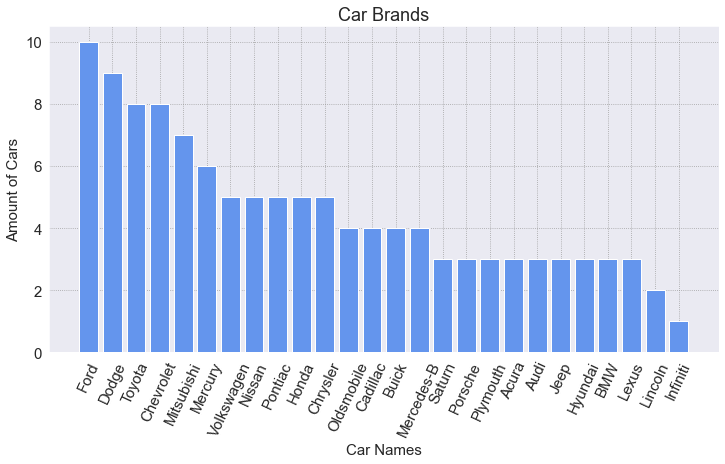

In [41]:
plt.title("Car Brands")
plt.xticks(rotation=65)
plt.bar(ba.index, ba, color = "cornflowerblue")
plt.xlabel("Car Names")
plt.ylabel("Amount of Cars")
plt.show()

**From this we can tell that they are 26 car brands with Ford having the highest number of cars.**

**2. What car type is patronized the most?**

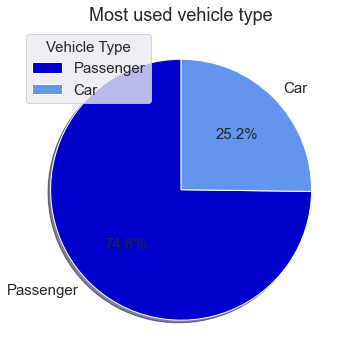

In [42]:
pie = df.Vehicle_type.value_counts()
plt.figure(figsize=(19,6))
plt.title("Most used vehicle type")
co=["mediumblue", "cornflowerblue"]
plt.pie(pie, labels=pie.index, autopct='%1.1f%%', startangle=90, shadow=True, colors=co)
plt.legend(title="Vehicle Type");

**Passenger car type is the most patronized car type.**

**3. What car brand sold the most?**

In [43]:
ty=new[["Car_Brand", "Sales(new)"]]
#ty.sum(axis=1).sort_values(ascending=False).head(3)
ty.nlargest(1, 'Sales(new)', keep='last')

,Car_Brand,Sales(new)
56,Ford,540561.0


**4. What car brand has the highest resale value?**

In [44]:
tpy=new[["Car_Brand", "Sales(used)"]]
tpy.nlargest(1, 'Sales(used)', keep='last')

,Car_Brand,Sales(used)
126,Porsche,67550.0


**5. What is the correlation between newly sold cars and its features?**

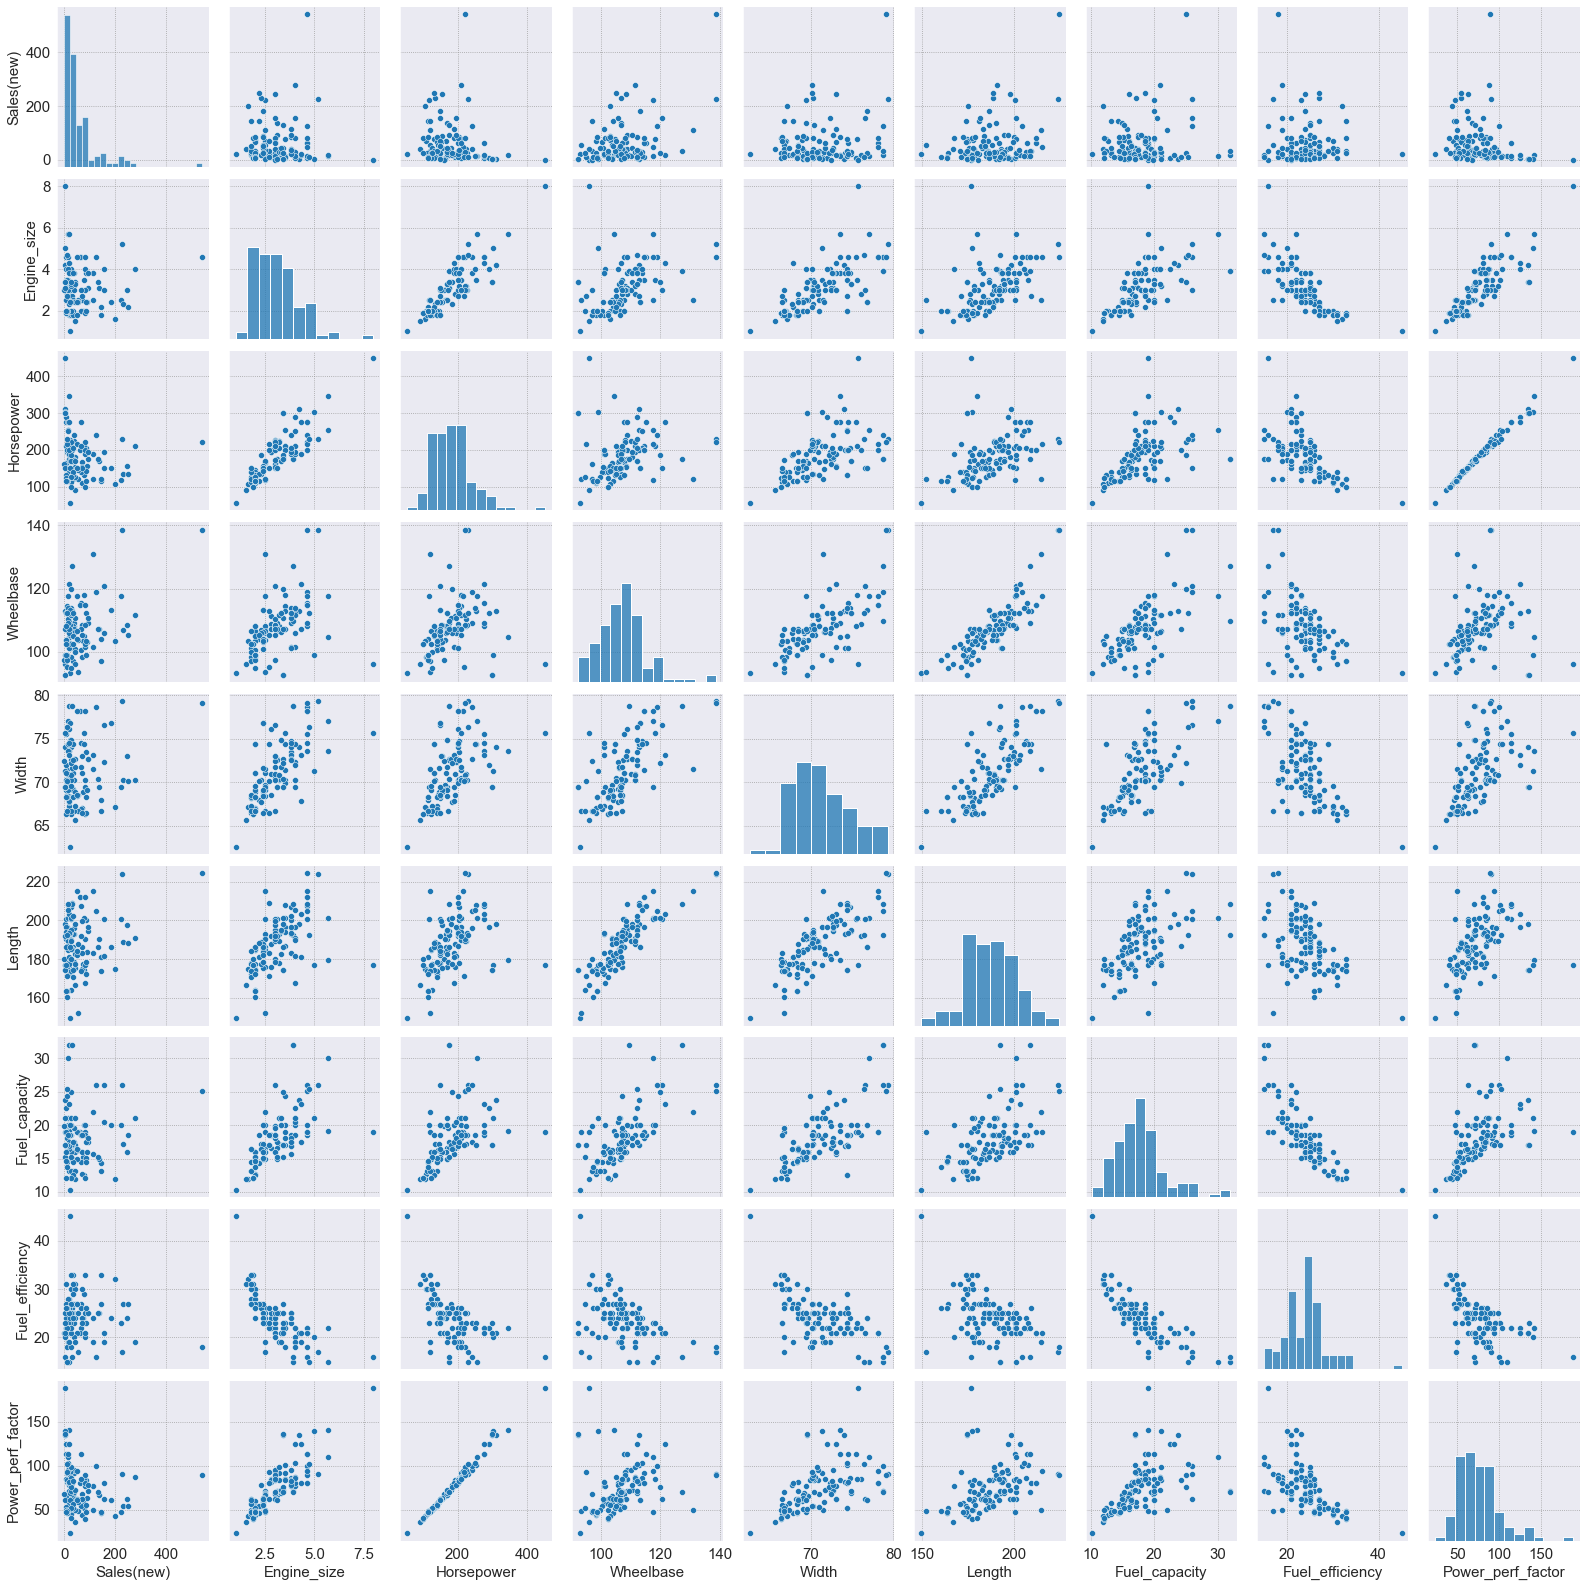

In [45]:
sales_vs_fea=df[['Sales(new)','Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor' ]]
sns.pairplot(sales_vs_fea)

Using seaborn paiplot function, we can visualize the correlation between the sales and the car's features.

**6. What is the correlation  between power-performance and sales correlation?**

Text(0.5, 1.0, 'Sales Vs Power Perf Factor')

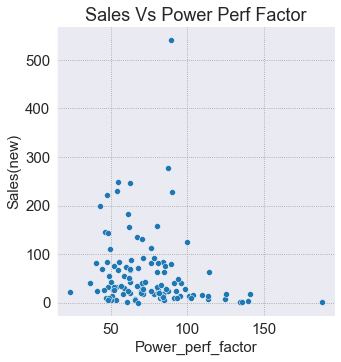

In [46]:
#sale_vs_power_perf=df[['Sales(new)', 'Power_perf_factor' ]]
#sns.heatmap(sale_vs_power_perf)
sns.relplot(data=df, y="Sales(new)", x="Power_perf_factor")
plt.title("Sales Vs Power Perf Factor" ) 

## Dashboard in Power BI 

I will convert to an excel file and build a dashboard using power bi and attach the picture to this notebook.

In [47]:
# Converting to an excel file.
df.to_excel('Car_Sales1.xlsx')

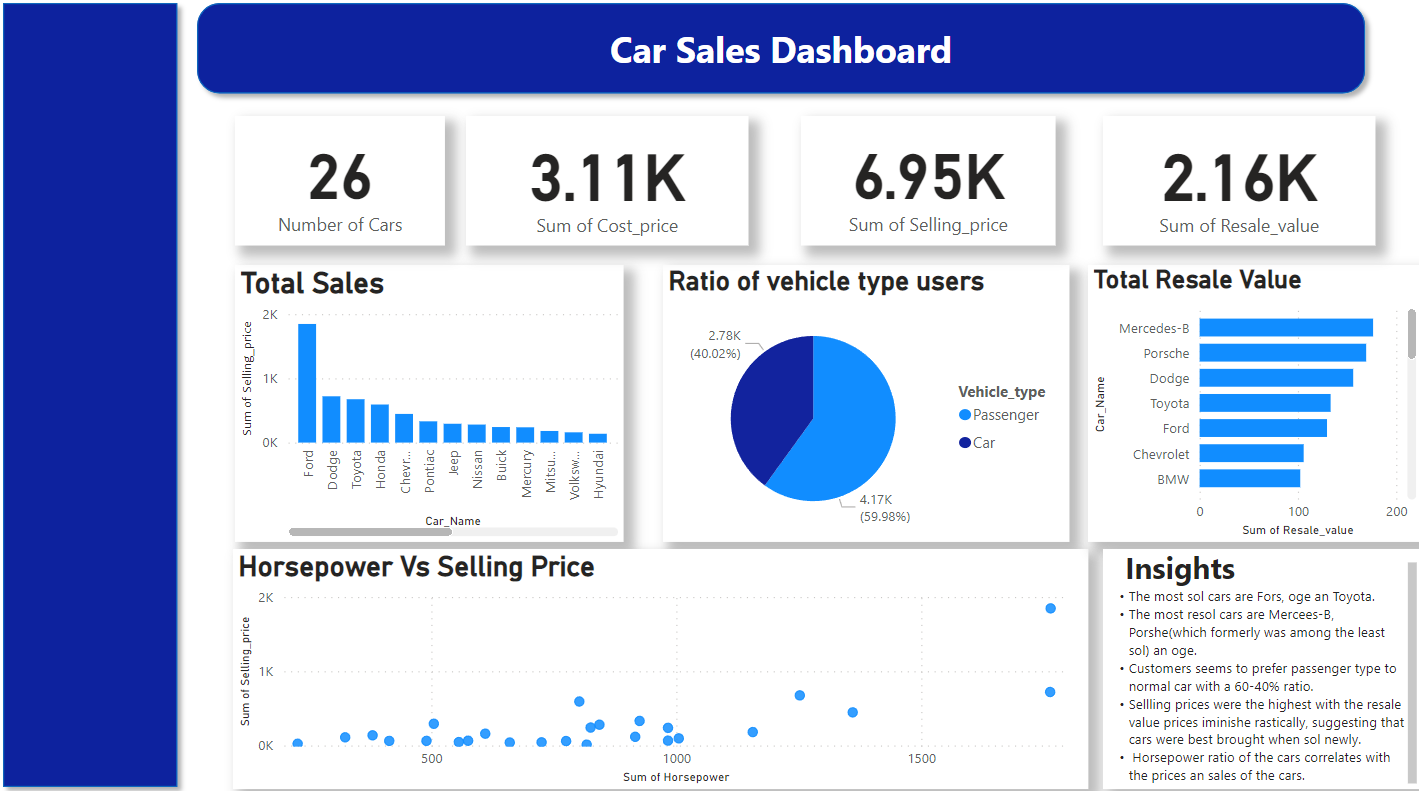

In [48]:
from IPython.display import Image
Image(r"C:\Users\Noorah\Pictures\Car sales 2.png")

No it is not interactive, it is a png file gotten from **power bi.**

## Insights and Recommendations

- They are 26 car brands with Ford having the highest number of cars.
- Passenger car type is the most patronized car type.
- Ford has the highest newly sold value.
- Porshe has the highest resale value.
- They are various correlations betwwen the car features and sales which suggests that these features matter when purchasing cars.

**Recommendations**.
- More passenger cars type shoud be purchased.
- Porshe seems to be the most resold therefore emphasis should be put in making it features last longer.


In [ ]:

!pip install jovian --upgrade --quiet

import jovian
project_name='Car_Sales_Analysis'
jovian.commit(project=project_name)
jovian.commit()